In [3]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. loads the data file;
wine_data = pd.read_csv('winequality-white.csv',delimiter=";", nrows =800)  
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# 2. construct a new binary column “good wine” that indicates whether the wine is good
wine_data['Good wine'] = wine_data['quality'].apply(lambda x: True if x >= 7 else False)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Good wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [7]:
# 3. splits the data set into a training data set (first 400 samples), a validation data set (next 200 samples) and a test data set (last 200 samples)
training_data, validation_data, test_data = wine_data[:400], wine_data[400:600], wine_data[600:]

In [8]:
# 4. normalises the training data according to the Z-score transform
def normalises_the_data_z_score(input_data):
    data_normalised = preprocessing.scale(input_data)
    data_normalised = pd.DataFrame(data=data_normalised,columns = list(input_data.columns))
    data_normalised['Good wine'] = input_data['Good wine']
    return data_normalised
training_data_normalised = normalises_the_data_z_score(training_data)
validation_data_normalised = normalises_the_data_z_score(validation_data)
test_data_normalised = normalises_the_data_z_score(test_data)


In [9]:
# 5
training_data_normalised_x = training_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
training_data_normalised_y = training_data['quality']

validation_data_normalised_x = validation_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
validation_data_normalised_y = validation_data['quality']
scores_list = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(training_data_normalised_x, training_data_normalised_y)
   validation_data_normalised_y_predicted = classifier.predict(validation_data_normalised_x)
   scores_list.append(1-metrics.accuracy_score(validation_data_normalised_y,validation_data_normalised_y_predicted,normalize=True))
scores_list_df = pd.DataFrame(data=scores_list).rename(columns={0: "Classificaion error(validation data)"})
scores_list_df['k-value'] = list(range(1,101))

# The part below is to use the trainning data to predict the training data. I want to duplicate the chart on the 20th pages of the slides to verify the accuracy of my code.
scores_list = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(training_data_normalised_x, training_data_normalised_y)
   training_data_normalised_y_predicted = classifier.predict(training_data_normalised_x)
   scores_list.append(1-metrics.accuracy_score(training_data_normalised_y,training_data_normalised_y_predicted,normalize=True))
scores_list_df['Classificaion error(training data)'] = scores_list

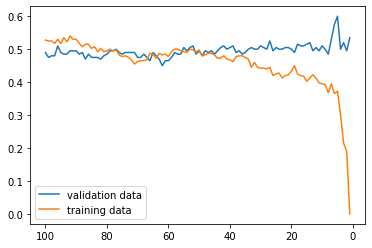

In [10]:
# Plot the classification error
plt.plot(scores_list_df['k-value'], scores_list_df['Classificaion error(validation data)'], label = "validation data")
plt.plot(scores_list_df['k-value'], scores_list_df['Classificaion error(training data)'], label = "training data")
plt.gca().invert_xaxis()
plt.legend()

# While k = 1, the accuracy of predicting the wine quality of training data is 100%, which matches what professor mentioned in the class. Therefore, I believe this code is correct, but let me know if you think any part is wrong 

In [24]:
# 6

best_k_value=scores_list_df['Classificaion error(validation data)'].idxmin()+1
best_k_value

62

In [25]:
# 7
test_data_normalised_x = test_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
test_data_normalised_y = test_data['quality']


classifier = KNeighborsClassifier(n_neighbors=best_k_value)
classifier.fit(test_data_normalised_x, test_data_normalised_y)
test_data_normalised_y_predicted = classifier.predict(test_data_normalised_x)
testing_data_error_ratio= 1-metrics.accuracy_score(test_data_normalised_y,test_data_normalised_y_predicted,normalize=True)


testing_data_error_ratio




0.51